## F1 Data Analysis (EDA)

**Dataset From :**
https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/data?select=seasons.csv

In [ ]:
import pandas as pd
import numpy as np

circuits = pd.read_csv('circuits.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
driver_standings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
results = pd.read_csv('results.csv')

datasets = [constructor_results, constructor_standings, driver_standings, results]
for df in datasets:
    df.replace('\\N', np.nan, inplace=True)

for df in datasets:
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

### Aggregating Data at the Team Level

<span style="color:red">Current 10 Teams (2024)</span>

In [46]:

constructors = pd.read_csv('constructors.csv')

# List of current F1 team names as of 2024
current_teams = [
    "Red Bull", "Mercedes", "Ferrari", "McLaren", 
    "Aston Martin", "Alpine F1 Team", "Haas F1 Team", 
    "Alfa Romeo", "AlphaTauri", "Williams"
]

current_f1_teams = constructors[constructors['name'].isin(current_teams)]

current_f1_teams.reset_index(drop=True, inplace=True)

# filtered dataframe
current_f1_teams.head(10)


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
2,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
3,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
4,51,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...
5,117,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...
6,131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
7,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
8,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
9,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [ ]:
current_f1_teams.to_csv('current_f1_teams.csv', index=False)

   constructorId   points            name
0              1  61413.5         McLaren
1              3  32398.5        Williams
2              6  96699.0         Ferrari
3              9  77850.5        Red Bull
4             51   2223.0      Alfa Romeo
5            117   5830.0    Aston Martin
6            131  77810.5        Mercedes
7            210   3463.0    Haas F1 Team
8            213   2998.0      AlphaTauri
9            214   4746.0  Alpine F1 Team


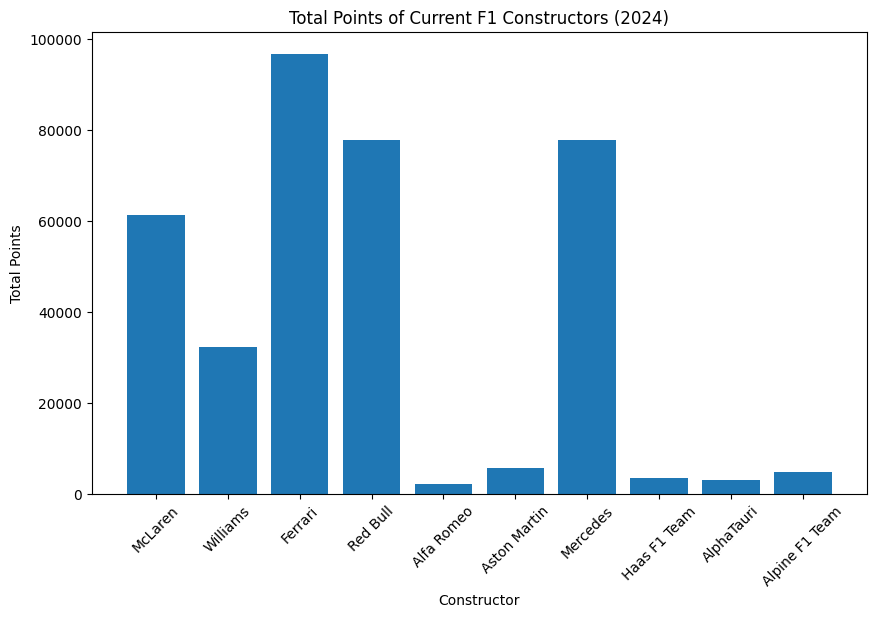

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


total_points = constructor_standings[constructor_standings['constructorId'].isin(current_f1_teams['constructorId'])]
total_points_summary = total_points.groupby('constructorId')['points'].sum().reset_index()

total_points_summary = total_points_summary.merge(current_f1_teams[['constructorId', 'name']], on='constructorId')

print(total_points_summary)


plt.figure(figsize=(10, 6))
plt.bar(total_points_summary['name'], total_points_summary['points'])
plt.xlabel("Constructor")
plt.ylabel("Total Points")
plt.title("Total Points of Current F1 Constructors (2024)")
plt.xticks(rotation=45)
plt.show()

### Aggretate Data at Driver Level

<span style="color:red">Current 20 Drivers (2024)</span>


In [ ]:
current_drivers = [
    "Lewis Hamilton", "George Russell", "Max Verstappen", "Sergio Perez", 
    "Charles Leclerc", "Carlos Sainz", "Lando Norris", "Oscar Piastri",
    "Fernando Alonso", "Lance Stroll", "Esteban Ocon", "Pierre Gasly", 
    "Kevin Magnussen", "Daniel Ricciardo", "Valtteri Bottas", "Zhou Guanyu", 
    "Yuki Tsunoda", "Alexander Albon", "Logan Sargeant"
]

missing_drivers = set(current_drivers) - set(drivers['full_name'])
print("Drivers not found:", missing_drivers)

# Filter to only include current drivers
drivers['full_name'] = drivers['forename'] + ' ' + drivers['surname']
current_f1_drivers = drivers[drivers['full_name'].isin(current_drivers)]

current_f1_drivers.reset_index(drop=True, inplace=True)
current_f1_drivers.head(20)

Drivers not found: {'Zhou Guanyu', 'Sergio Perez'}


,driverId,driverRef,number,code,forename,surname,dob,nationality,url,full_name
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
2,842,gasly,10,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly,Pierre Gasly
3,817,ricciardo,3,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo,Daniel Ricciardo
4,822,bottas,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas,Valtteri Bottas
5,825,kevin_magnussen,20,MAG,Kevin,Magnussen,1992-10-05,Danish,http://en.wikipedia.org/wiki/Kevin_Magnussen,Kevin Magnussen
6,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,Max Verstappen
7,832,sainz,55,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.,Carlos Sainz
8,839,ocon,31,OCO,Esteban,Ocon,1996-09-17,French,http://en.wikipedia.org/wiki/Esteban_Ocon,Esteban Ocon
9,840,stroll,18,STR,Lance,Stroll,1998-10-29,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll,Lance Stroll


In [ ]:
current_drivers = [
    "Lewis Hamilton", "George Russell", "Max Verstappen", "Sergio Perez", 
    "Charles Leclerc", "Carlos Sainz", "Lando Norris", "Oscar Piastri",
    "Fernando Alonso", "Lance Stroll", "Esteban Ocon", "Pierre Gasly", 
    "Kevin Magnussen", "Daniel Ricciardo", "Valtteri Bottas", "Zhou Guanyu", 
    "Yuki Tsunoda", "Alexander Albon", "Logan Sargeant"
]

drivers['full_name'] = drivers['forename'] + ' ' + drivers['surname']

# Filter to only include current drivers
current_f1_drivers = drivers[drivers['full_name'].isin(current_drivers)]

current_f1_drivers.reset_index(drop=True, inplace=True)

current_f1_drivers.to_csv('current_f1_drivers_2024.csv', index=False)
print("Filtered driver data saved as 'current_f1_drivers_2024.csv'")

Filtered driver data saved as 'current_f1_drivers_2024.csv'


In [ ]:
import pandas as pd

driver_standings = pd.read_csv('driver_standings.csv')

driver_standings_filtered = driver_standings[driver_standings['driverId'].isin(current_f1_drivers['driverId'])]

# Aggregate total points
driver_points_summary = driver_standings_filtered.groupby('driverId')['points'].sum().reset_index()

# add driver names
driver_points_summary = driver_points_summary.merge(
    current_f1_drivers[['driverId', 'full_name']], on='driverId'
)

driver_points_summary.to_csv('aggregated_driver_points_2024.csv', index=False)

driver_points_summary.head(20)

,driverId,points,full_name
0,1,49022.5,Lewis Hamilton
1,4,23879.0,Fernando Alonso
2,817,13705.0,Daniel Ricciardo
3,822,19541.0,Valtteri Bottas
4,825,2527.0,Kevin Magnussen
5,830,28687.5,Max Verstappen
6,832,11561.5,Carlos Sainz
7,839,4378.0,Esteban Ocon
8,840,3045.0,Lance Stroll
9,842,4302.0,Pierre Gasly


**Filter Datasets for Current Teams and Drivers Only**

In [ ]:
import pandas as pd

current_f1_teams = pd.read_csv('current_f1_teams.csv')
current_f1_drivers = pd.read_csv('current_f1_drivers_2024.csv')
driver_standings = pd.read_csv('driver_standings.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
results = pd.read_csv('results.csv')
lap_times = pd.read_csv('lap_times.csv')

results_filtered = results[
    (results['driverId'].isin(current_f1_drivers['driverId'])) &
    (results['constructorId'].isin(current_f1_teams['constructorId']))
]

driver_standings_filtered = driver_standings[driver_standings['driverId'].isin(current_f1_drivers['driverId'])]
constructor_standings_filtered = constructor_standings[constructor_standings['constructorId'].isin(current_f1_teams['constructorId'])]

**Merge Datasets** to Create a Comprehensive View of Race Outcomes

In [ ]:
merged_data = results_filtered.merge(driver_standings_filtered[['raceId', 'driverId', 'points', 'position']],
                                     on=['raceId', 'driverId'],
                                     suffixes=('', '_driver_standings'))

merged_data = merged_data.merge(constructor_standings_filtered[['raceId', 'constructorId', 'points', 'position']],
                                on=['raceId', 'constructorId'],
                                suffixes=('', '_constructor_standings'))


Calculate Points per Lap and Average Lap Time

In [ ]:
lap_times_filtered = lap_times[lap_times['driverId'].isin(current_f1_drivers['driverId'])]

total_laps_per_race = lap_times_filtered.groupby(['raceId', 'driverId'])['lap'].count().reset_index()
total_laps_per_race.rename(columns={'lap': 'total_laps'}, inplace=True)

merged_data = merged_data.merge(total_laps_per_race, on=['raceId', 'driverId'], how='left')

merged_data['points_per_lap'] = merged_data['points'] / merged_data['total_laps']

# Calculate average lap time for each driver
average_lap_time = lap_times_filtered.groupby(['raceId', 'driverId'])['milliseconds'].mean().reset_index()
average_lap_time.rename(columns={'milliseconds': 'avg_lap_time_ms'}, inplace=True)

# Merge average lap time with merged_data
merged_data = merged_data.merge(average_lap_time, on=['raceId', 'driverId'], how='left')


Calculate **Number of Races** Finished in the **Top 5** or **Top 10**

In [ ]:
merged_data['position'] = pd.to_numeric(merged_data['position'], errors='coerce')

# Drop rows where 'position' is NaN
merged_data = merged_data.dropna(subset=['position'])

merged_data['position'] = merged_data['position'].astype(int)

# flags
merged_data['is_top_5'] = merged_data['position'] <= 5
merged_data['is_top_10'] = merged_data['position'] <= 10

# Calculate the number of top 5,10 finishes per driver
top_finishes_summary = merged_data.groupby('driverId').agg({
    'is_top_5': 'sum',
    'is_top_10': 'sum'
}).reset_index()

top_finishes_summary = top_finishes_summary.merge(current_f1_drivers[['driverId', 'full_name']], on='driverId')

top_finishes_summary.head()

,driverId,is_top_5,is_top_10,full_name
0,1,255,302,Lewis Hamilton
1,4,101,183,Fernando Alonso
2,817,64,97,Daniel Ricciardo
3,822,104,145,Valtteri Bottas
4,825,5,44,Kevin Magnussen


### Growth rate 
**of each team’s <span style="color:red">wins</span> and <span style="color:red">podium finishes (top 3)</span> over time**

1.	Filter Data: Only include the current 10 teams.

2.	Calculate Wins and Podiums per Season: Count the number of wins and podium finishes (top 3) for each team per season.

3.	Calculate Growth Rate: Compute the annual growth rate in the number of wins and podiums.

**FIRST ATTEMPT**

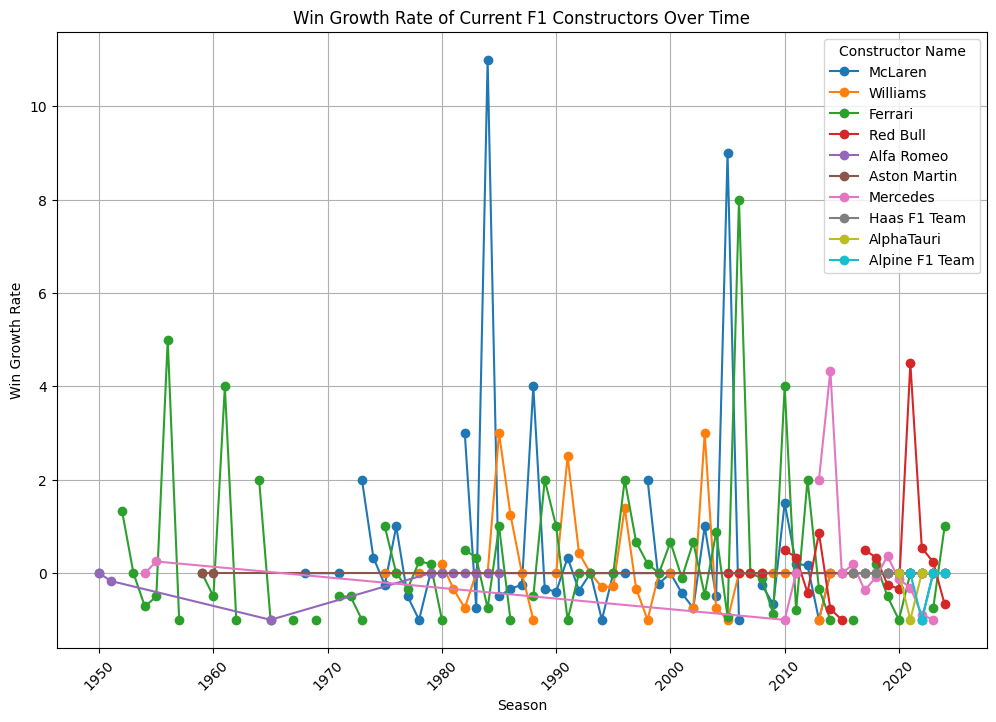

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv('results.csv')
current_f1_teams = pd.read_csv('current_f1_teams.csv')  # Contains only the 10 current constructors
races = pd.read_csv('races.csv')

# Merge `results` with `races` to add [year] to `results`
results_with_season = results.merge(races[['raceId', 'year']], on='raceId', how='left')
results_with_season.rename(columns={'year': 'season'}, inplace=True)

results_filtered = results_with_season[results_with_season['constructorId'].isin(current_f1_teams['constructorId'])].copy()

# Clean up
results_filtered['position'] = pd.to_numeric(results_filtered['position'], errors='coerce')
results_filtered = results_filtered.dropna(subset=['position'])
results_filtered['position'] = results_filtered['position'].astype(int)

# Add columns for "win" and "podium" based on the cleaned 'position' column
results_filtered['is_win'] = results_filtered['position'] == 1
results_filtered['is_podium'] = results_filtered['position'] <= 3

# Calculate!
team_performance = results_filtered.groupby(['constructorId', 'season']).agg(
    wins=('is_win', 'sum'),
    podiums=('is_podium', 'sum')
).reset_index()

team_performance = team_performance[team_performance['constructorId'].isin(current_f1_teams['constructorId'])]

# Calculate growth rate of wins and podiums year over year
team_performance = team_performance.sort_values(by=['constructorId', 'season'])
team_performance['win_growth_rate'] = team_performance.groupby('constructorId')['wins'].pct_change().fillna(0)
team_performance['podium_growth_rate'] = team_performance.groupby('constructorId')['podiums'].pct_change().fillna(0)

team_performance = team_performance.merge(current_f1_teams[['constructorId', 'name']], on='constructorId', how='left')


plt.figure(figsize=(12, 8))

for constructor_name in team_performance['name'].unique():
    constructor_data = team_performance[team_performance['name'] == constructor_name]
    plt.plot(constructor_data['season'], constructor_data['win_growth_rate'], marker='o', label=constructor_name)

plt.xlabel('Season')
plt.ylabel('Win Growth Rate')
plt.title('Win Growth Rate of Current F1 Constructors Over Time')
plt.legend(title='Constructor Name')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**SECOND ATTEMPT**

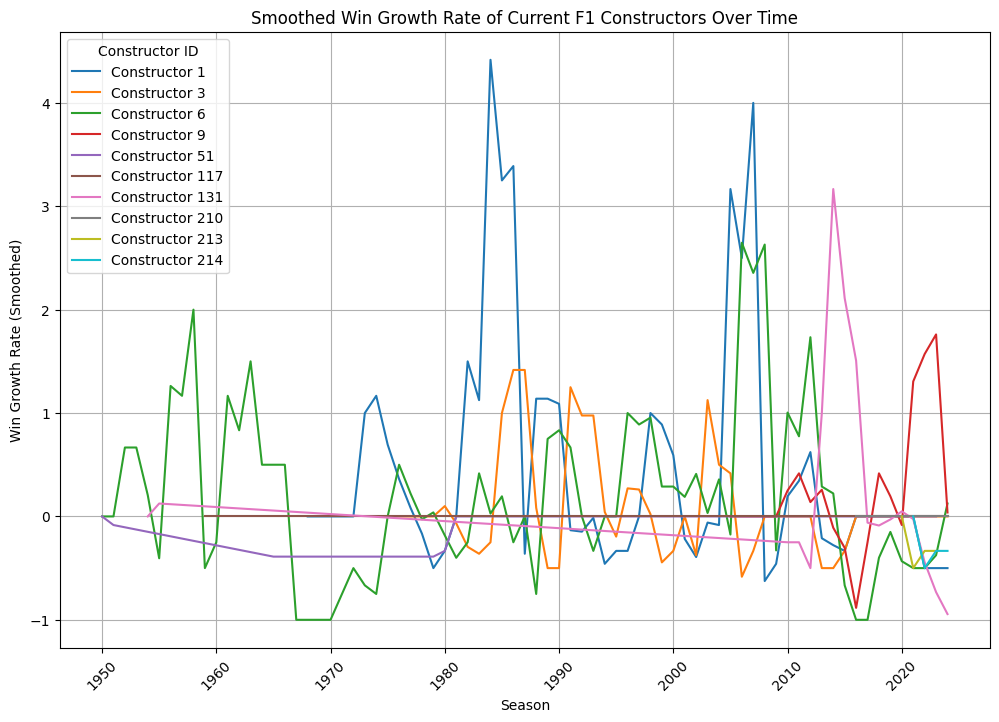

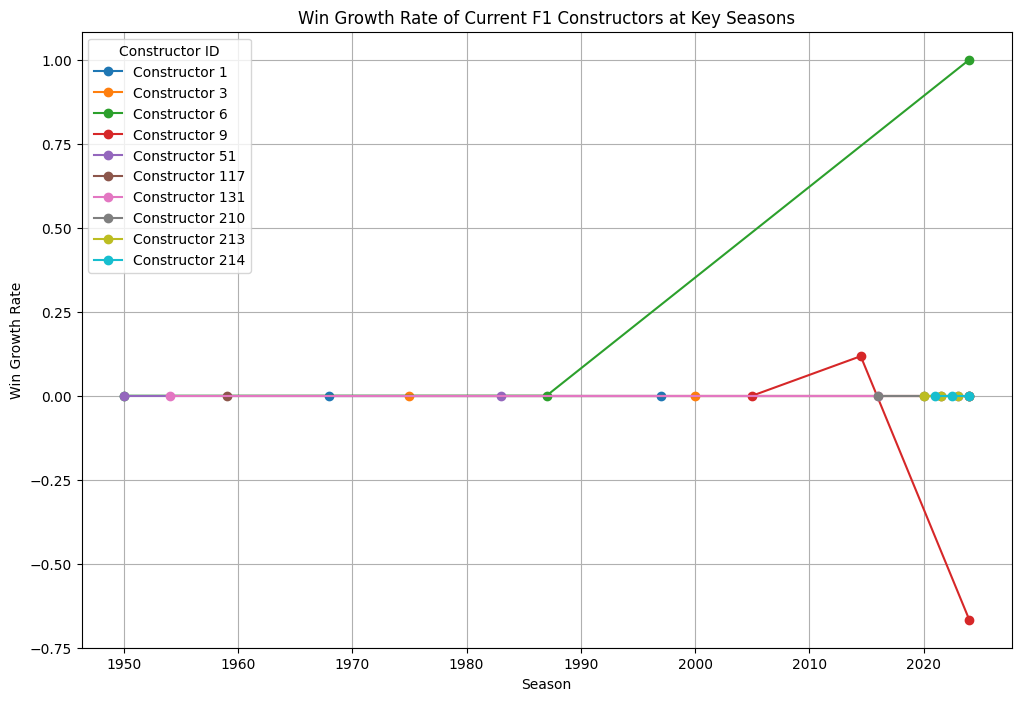

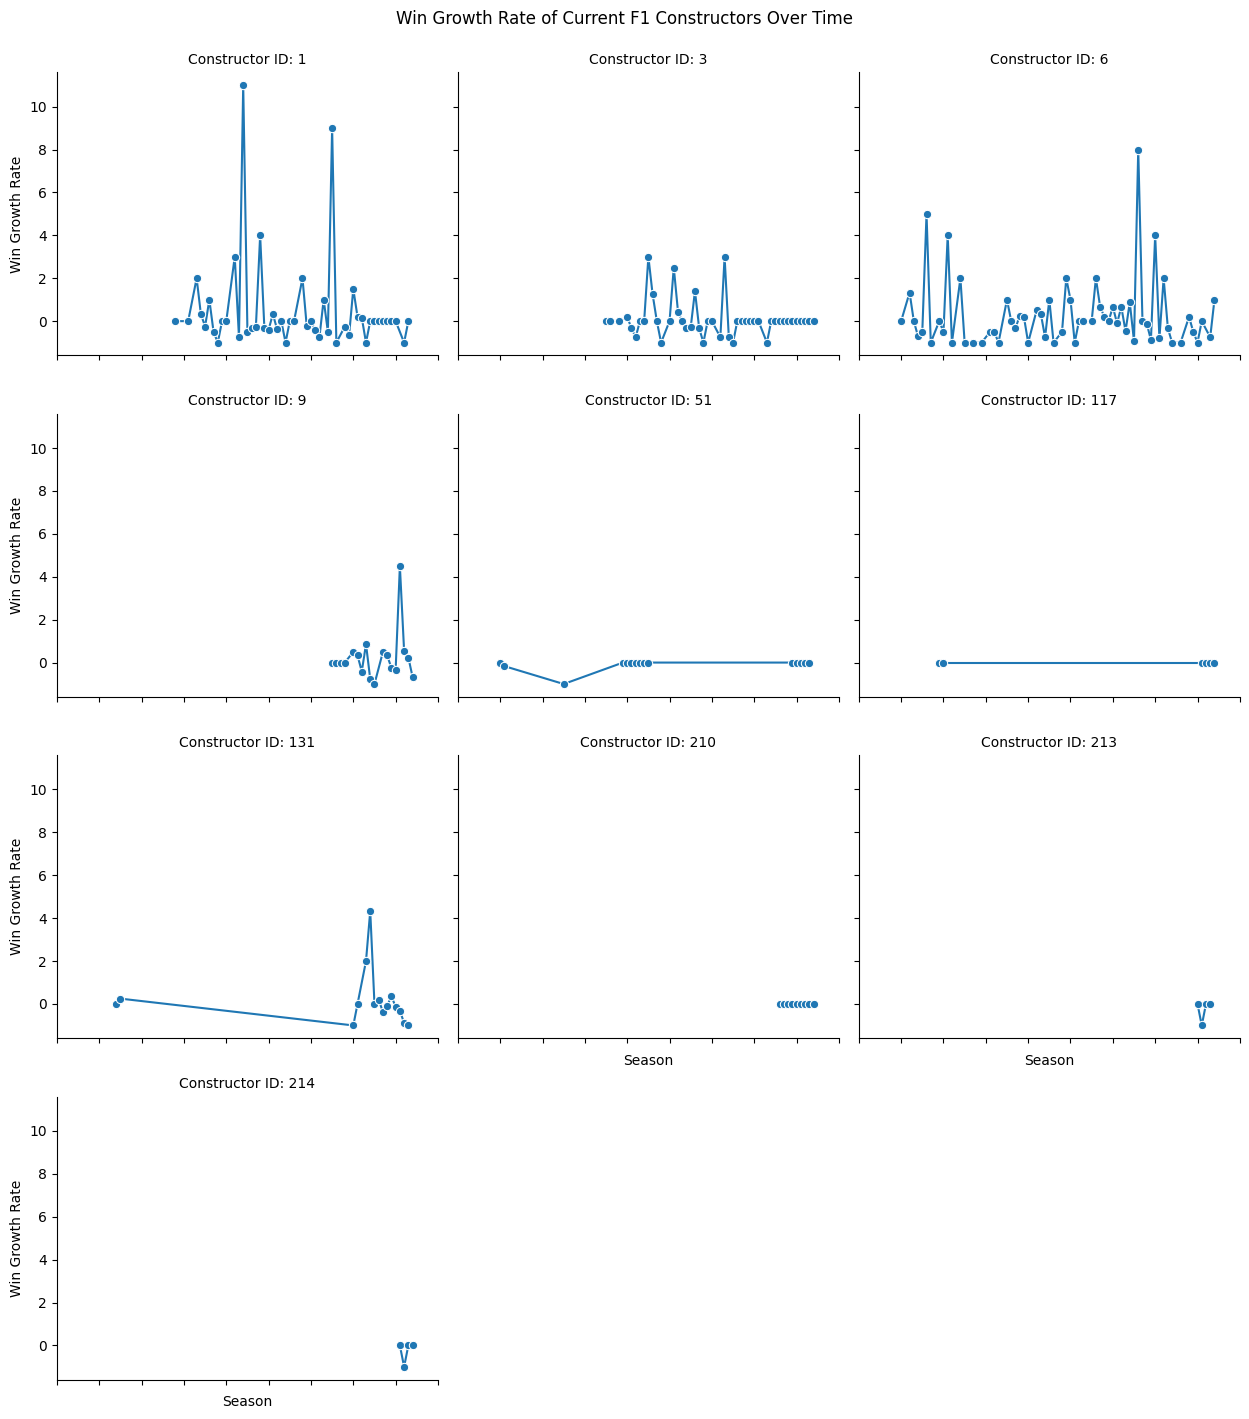

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

results = pd.read_csv('results.csv')
current_f1_teams = pd.read_csv('current_f1_teams.csv')
races = pd.read_csv('races.csv')

results_with_season = results.merge(races[['raceId', 'year']], on='raceId', how='left')
results_with_season.rename(columns={'year': 'season'}, inplace=True)

results_filtered = results_with_season[results_with_season['constructorId'].isin(current_f1_teams['constructorId'])].copy()

results_filtered['position'] = pd.to_numeric(results_filtered['position'], errors='coerce')

results_filtered = results_filtered.dropna(subset=['position'])

results_filtered['position'] = results_filtered['position'].astype(int)

results_filtered['is_win'] = results_filtered['position'] == 1
results_filtered['is_podium'] = results_filtered['position'] <= 3

team_performance = results_filtered.groupby(['constructorId', 'season']).agg(
    wins=('is_win', 'sum'),
    podiums=('is_podium', 'sum')
).reset_index()

team_performance = team_performance[team_performance['constructorId'].isin(current_f1_teams['constructorId'])]

team_performance = team_performance.sort_values(by=['constructorId', 'season'])
team_performance['win_growth_rate'] = team_performance.groupby('constructorId')['wins'].pct_change().fillna(0)
team_performance['podium_growth_rate'] = team_performance.groupby('constructorId')['podiums'].pct_change().fillna(0)

# Rolling Average Line Plot
team_performance['win_growth_rate_smooth'] = team_performance.groupby('constructorId')['win_growth_rate'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

plt.figure(figsize=(12, 8))
for constructor_id in team_performance['constructorId'].unique():
    constructor_data = team_performance[team_performance['constructorId'] == constructor_id]
    plt.plot(constructor_data['season'], constructor_data['win_growth_rate_smooth'], label=f'Constructor {constructor_id}')

plt.xlabel('Season')
plt.ylabel('Win Growth Rate (Smoothed)')
plt.title('Smoothed Win Growth Rate of Current F1 Constructors Over Time')
plt.legend(title='Constructor ID')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Slope Graph for Key Points
key_seasons = pd.concat([
    team_performance.groupby('constructorId').first(),
    team_performance.groupby('constructorId').median(),
    team_performance.groupby('constructorId').last()
]).reset_index()

plt.figure(figsize=(12, 8))
for constructor_id in key_seasons['constructorId'].unique():
    constructor_data = key_seasons[key_seasons['constructorId'] == constructor_id]
    plt.plot(constructor_data['season'], constructor_data['win_growth_rate'], marker='o', label=f'Constructor {constructor_id}')

plt.xlabel('Season')
plt.ylabel('Win Growth Rate')
plt.title('Win Growth Rate of Current F1 Constructors at Key Seasons')
plt.legend(title='Constructor ID')
plt.grid(True)
plt.show()

# Facet Grid of Line Charts (Small Multiples)
g = sns.FacetGrid(team_performance, col="constructorId", col_wrap=3, height=3.5, aspect=1.2)
g.map(sns.lineplot, "season", "win_growth_rate", marker="o")
g.set_axis_labels("Season", "Win Growth Rate")
g.set_titles("Constructor ID: {col_name}")
g.fig.suptitle("Win Growth Rate of Current F1 Constructors Over Time", y=1.02)
g.set_xticklabels(rotation=45)
plt.show()


Hypothetical Analysis of Pit stops > How they would impact race results

In [ ]:
import pandas as pd

results = pd.read_csv('results.csv')
pit_stops = pd.read_csv('pit_stops.csv')
races = pd.read_csv('races.csv')

spanish_gp_race_id = 1105

def time_to_seconds(time_str):
    if pd.isna(time_str) or not isinstance(time_str, str):
        return float('nan')
    
    try:
        # Split the time string into components (H:MM:SS.sss)
        time_parts = time_str.split(':')
        if len(time_parts) == 3:  
            hours = int(time_parts[0])
            minutes = int(time_parts[1])
            seconds = float(time_parts[2])
            return hours * 3600 + minutes * 60 + seconds
        elif len(time_parts) == 2: 
            minutes = int(time_parts[0])
            seconds = float(time_parts[1])
            return minutes * 60 + seconds
        else:
            return float('nan')
    except Exception as e:
        print(f"Error converting time '{time_str}': {e}")
        return float('nan')

driver_id = 1 
hamilton_results = results[(results['raceId'] == spanish_gp_race_id) & (results['driverId'] == driver_id)]

if hamilton_results.empty:
    print("Driver ID 1 does not have results for the Spanish Grand Prix (Race ID: 1105).")
else:
    # Get pit stop data for the driver with ID 1
    driver_pit_stops = pit_stops[(pit_stops['raceId'] == spanish_gp_race_id) & (pit_stops['driverId'] == driver_id)]

    driver_pit_stops['duration'] = pd.to_numeric(driver_pit_stops['duration'], errors='coerce')  # Ensure duration is numeric
    original_duration = driver_pit_stops['duration'].sum()  # Total original pit stop duration

    # Convert Hamilton's race time from string to seconds
    original_race_time_str = hamilton_results['time'].iloc[0]
    original_race_time = time_to_seconds(original_race_time_str)  # Convert race time to seconds

    print(f"Original race time for Driver ID 1: '{original_race_time_str}' -> {original_race_time} seconds")

    new_pit_stop_duration = 30  # seconds
    new_total_time = original_race_time + (new_pit_stop_duration - original_duration)

    results['time'] = results['time'].apply(time_to_seconds)  # Convert all times in results to seconds

    # Handle potential NaN values in the 'time' column before updating
    results['time'].fillna(0, inplace=True)  # Fill NaNs with 0 or a suitable value

    # Update the time for the driver with ID 1
    results.loc[results['raceId'] == spanish_gp_race_id, 'time'] = results['time'].where(results['driverId'] != driver_id, new_total_time)

    if results['time'].isna().any():
        print("Warning: There are still NaN values in the 'time' column after updates.")
    else:
        results['position'] = results['time'].rank(method='min').astype(int)

        new_driver_results = results[results['driverId'] == driver_id]
        print("\nUpdated results for Driver ID 1:")
        print(new_driver_results[['driverId', 'time', 'position']])
        
        updated_results = results[results['raceId'] == spanish_gp_race_id].sort_values(by='position')
        print("\nUpdated race results for the Spanish Grand Prix:")
        print(updated_results[['driverId', 'time', 'position']])

Original race time for Driver ID 1: '+24.090' -> nan seconds


/var/folders/5k/t0py0h2s4cndm43zf8xhr14r0000gn/T/ipykernel_45602/3240342951.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_pit_stops['duration'] = pd.to_numeric(driver_pit_stops['duration'], errors='coerce')  # Ensure duration is numeric


Hamilton Results:         resultId  raceId  driverId  constructorId number  grid position  \
25961     25967    1105         1            131     44     4        2   

      positionText  positionOrder  points  laps     time milliseconds  \
25961            2              2    18.0    66  +24.090      5302030   

      fastestLap rank fastestLapTime fastestLapSpeed  statusId  
25961         62    3       1:16.676         218.649         1  
Hamilton Pit Stops:        raceId  driverId  stop  lap      time duration  milliseconds
9870    1105         1     1   24  15:35:37   22.575         22575
9892    1105         1     2   50  16:10:22   22.731         22731
Original race time string: '+24.090'
Converted original race time: nan seconds
Original pit stop duration: 45.306 seconds
New total time calculation: nan seconds


/var/folders/5k/t0py0h2s4cndm43zf8xhr14r0000gn/T/ipykernel_45602/1308295515.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_pit_stops['duration'] = pd.to_numeric(driver_pit_stops['duration'], errors='coerce')  # Ensure duration is numeric


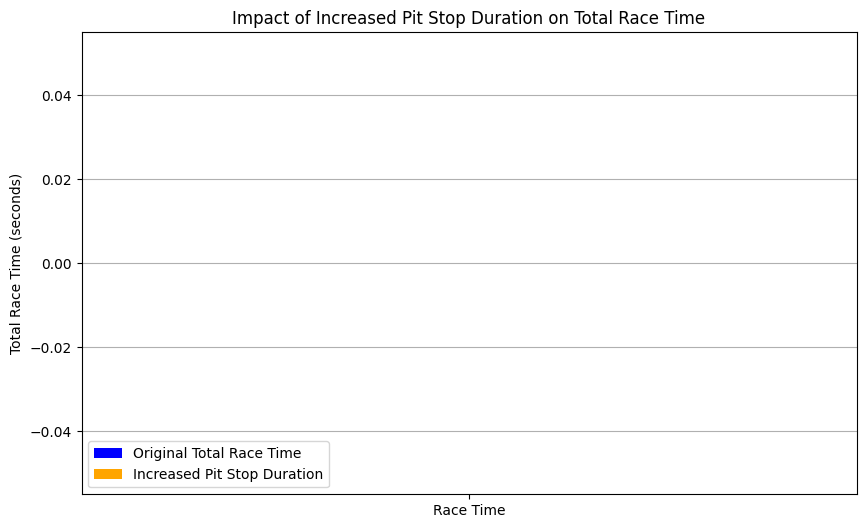


Original Total Race Time:  nan seconds
New Total Race Time with increased pit stop duration:  nan seconds


In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load necessary datasets
results = pd.read_csv('results.csv')  # Race results dataset
pit_stops = pd.read_csv('pit_stops.csv')  # Pit stop data dataset
races = pd.read_csv('races.csv')  # Races dataset

# Define the race ID for the Spanish Grand Prix
spanish_gp_race_id = 1105

# Function to convert time strings (H:MM:SS.sss) to total seconds
def time_to_seconds(time_str):
    if pd.isna(time_str) or not isinstance(time_str, str):
        return float('nan')
    
    time_parts = time_str.strip('+').split(':')
    if len(time_parts) == 3:  # H:MM:SS.sss
        hours = int(time_parts[0])
        minutes = int(time_parts[1])
        seconds = float(time_parts[2])
        return hours * 3600 + minutes * 60 + seconds
    elif len(time_parts) == 2:  # MM:SS.sss
        minutes = int(time_parts[0])
        seconds = float(time_parts[1])
        return minutes * 60 + seconds
    else:
        return float('nan')

# Step 1: Get race results for the driver with ID 1 (assumed to be Lewis Hamilton)
driver_id = 1  # Driver ID for Hamilton
hamilton_results = results[(results['raceId'] == spanish_gp_race_id) & (results['driverId'] == driver_id)]

# Debug: Check if results are empty
print("Hamilton Results: ", hamilton_results)

# Check if there are any results for the driver
if hamilton_results.empty:
    print("Driver ID 1 does not have results for the Spanish Grand Prix (Race ID: 1105).")
else:
    # Get pit stop data for the driver with ID 1
    driver_pit_stops = pit_stops[(pit_stops['raceId'] == spanish_gp_race_id) & (pit_stops['driverId'] == driver_id)]
    
    # Debug: Check if pit stops are empty
    print("Hamilton Pit Stops: ", driver_pit_stops)

    # Step 2: Calculate original total time
    driver_pit_stops['duration'] = pd.to_numeric(driver_pit_stops['duration'], errors='coerce')  # Ensure duration is numeric
    original_duration = driver_pit_stops['duration'].sum()  # Total original pit stop duration

    # Convert Hamilton's race time from string to seconds
    original_race_time_str = hamilton_results['time'].iloc[0]
    original_race_time = time_to_seconds(original_race_time_str)  # Convert race time to seconds

    # Debug: Print original race time
    print(f"Original race time string: '{original_race_time_str}'")
    print(f"Converted original race time: {original_race_time} seconds")
    print(f"Original pit stop duration: {original_duration} seconds")

    # Step 3: Calculate new race time with a hypothetical 30-second pit stop
    new_pit_stop_duration = 30  # seconds
    new_total_time = original_race_time + (new_pit_stop_duration - original_duration)

    # Debug: Print new total time
    print(f"New total time calculation: {new_total_time} seconds")

    # Step 4: Visualize the total race time impact as a stacked bar chart
    total_times = [original_race_time, new_pit_stop_duration]  # Original time and the increased pit stop duration
    plt.figure(figsize=(10, 6))
    
    plt.bar('Race Time', total_times[0], color='blue', label='Original Total Race Time')
    plt.bar('Race Time', total_times[1], bottom=total_times[0], color='orange', label='Increased Pit Stop Duration')

    plt.ylabel('Total Race Time (seconds)')
    plt.title('Impact of Increased Pit Stop Duration on Total Race Time')
    plt.legend()
    plt.grid(axis='y')

    plt.show()

    # Display the updated race results
    print("\nOriginal Total Race Time: ", original_race_time, "seconds")
    print("New Total Race Time with increased pit stop duration: ", new_total_time, "seconds")

In [4]:
import pandas as pd

races = pd.read_csv('races.csv')
aggregated_driver_points = pd.read_csv('aggregated_driver_points_2024.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
current_f1_drivers = pd.read_csv('current_f1_drivers_2024.csv')
current_f1_teams = pd.read_csv('current_f1_teams.csv')
driver_standings = pd.read_csv('driver_standings.csv')
scaled_metrics = pd.read_csv('Scaled_F1_Team_and_Driver_Metrics.csv')
seasons = pd.read_csv('seasons.csv')
results = pd.read_csv('results.csv')

In [10]:
recent_years = [2020, 2021, 2022, 2023, 2024]

results_with_year = results.merge(races[['raceId', 'year']], on='raceId')

constructor_standings_recent = constructor_standings.merge(
    results_with_year[['raceId', 'constructorId', 'year']], 
    on='constructorId', 
    how='inner'
)

constructor_standings_recent = constructor_standings_recent[
    constructor_standings_recent['year'].isin(recent_years)
]

In [30]:
results_with_year = results.merge(races[['raceId', 'year']], on='raceId')

results_recent = results_with_year[results_with_year['year'].isin(recent_years)]
# Ensure position is numeric and handle any string/null values
results_recent['position'] = pd.to_numeric(results_recent['position'], errors='coerce')

constructor_performance = results_recent.groupby(['constructorId', 'year']).agg({
    'position': lambda x: sum(x.astype(float) == 1.0),  # Explicitly convert to float for comparison
    'points': 'sum'
}).reset_index()

# Calculate overall performance
performance = constructor_performance.groupby('constructorId').agg({
    'position': 'sum',  # Sum of wins
    'points': 'sum'
}).reset_index()

performance = performance.rename(columns={'position': 'wins'})

# Only calculate performance score if there are actual wins
if performance['wins'].max() > 0:
    performance['performance_score'] = (
        (performance['wins'] / performance['wins'].max()) * 0.5 +
        (performance['points'] / performance['points'].max()) * 0.5
    )
else:
    # If no wins, base score only on points
    performance['performance_score'] = performance['points'] / performance['points'].max()

performance_with_names = performance.merge(
    current_f1_teams[['constructorId', 'name']], 
    on='constructorId'
)

print("\nTeam Performance (2020-2024):")
print(performance_with_names.sort_values('performance_score', ascending=False)[
    ['name', 'wins', 'points']
].to_string(index=False))


Team Performance (2020-2024):
          name  wins  points
      Red Bull    58  2747.5
      Mercedes    25  2251.5
       Ferrari     7  1611.5
       McLaren     2  1166.0
Alpine F1 Team     1   444.0
  Aston Martin     0   466.0
    AlphaTauri     1   306.0
    Alfa Romeo     0    90.0
  Haas F1 Team     0    70.0
      Williams     0    61.0


/var/folders/5k/t0py0h2s4cndm43zf8xhr14r0000gn/T/ipykernel_49375/3802490704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_recent['position'] = pd.to_numeric(results_recent['position'], errors='coerce')


### Performance Calculations

In [29]:
# Calculate performance with year weights
results_with_year = results.merge(races[['raceId', 'year']], on='raceId')
results_recent = results_with_year[results_with_year['year'].isin(recent_years)]

# Create year weights (2024: 0.4, 2023: 0.25, 2022: 0.15, 2021: 0.1, 2020: 0.1)
year_weights = {
    2024: 0.4,
    2023: 0.25,
    2022: 0.15,
    2021: 0.1,
    2020: 0.1
}

# Calculate weighted performance for each year
weighted_performance = []
for year in recent_years:
    year_data = results_recent[results_recent['year'] == year]
    year_perf = year_data.groupby('constructorId').agg({
        'position': lambda x: sum(x == 1),  # Count wins
        'points': 'sum'
    }).reset_index()
    
    # Normalize metrics for the year
    year_perf['wins_normalized'] = year_perf['position'] / year_perf['position'].max()
    year_perf['points_normalized'] = year_perf['points'] / year_perf['points'].max()
    
    # Calculate weighted score for the year
    year_perf['year_score'] = (
        (year_perf['wins_normalized'] * 0.5 + 
         year_perf['points_normalized'] * 0.5) * 
        year_weights[year]
    )
    
    # Store original metrics for display
    year_perf['weighted_wins'] = year_perf['position'] * year_weights[year]
    year_perf['weighted_points'] = year_perf['points'] * year_weights[year]
    
    weighted_performance.append(
        year_perf[['constructorId', 'year_score', 'weighted_wins', 'weighted_points']]
    )

# Combine all years
performance = pd.concat(weighted_performance)
performance_summary = performance.groupby('constructorId').agg({
    'year_score': 'sum',
    'weighted_wins': 'sum',
    'weighted_points': 'sum'
}).reset_index()

# Rename columns for clarity
performance_summary = performance_summary.rename(columns={
    'year_score': 'performance_score',
    'weighted_wins': 'wins',
    'weighted_points': 'points'
})

# Create the final view
performance_view = performance_summary.merge(
    current_f1_teams[['constructorId', 'name']], 
    on='constructorId'
)

print("\nTeam Performance (2020-2024, weighted by recency):")
print(performance_view.sort_values('performance_score', ascending=False)[
    ['name', 'wins', 'points', 'performance_score']
].to_string(index=False))


Team Performance (2020-2024, weighted by recency):
          name  wins  points  performance_score
       McLaren   0.0  246.20                0.0
      Williams   0.0   11.60                0.0
       Ferrari   0.0  324.35                0.0
      Red Bull   0.0  530.25                0.0
    Alfa Romeo   0.0   14.05                0.0
  Aston Martin   0.0  109.65                0.0
      Mercedes   0.0  367.50                0.0
  Haas F1 Team   0.0   17.50                0.0
    AlphaTauri   0.0   35.65                0.0
Alpine F1 Team   0.0   72.10                0.0


### Growth Rate Calculations

In [17]:
results_recent['position'] = pd.to_numeric(results_recent['position'], errors='coerce')

# Calculate yearly average positions
yearly_positions = results_recent.groupby(['constructorId', 'year'])['position'].mean().reset_index()

# Calculate first and last positions for each constructor
first_last_positions = yearly_positions.groupby('constructorId').agg({
    'position': ['first', 'last']
}).reset_index()

# Rename columns for clarity
first_last_positions.columns = ['constructorId', 'first_pos', 'last_pos']

# Calculate position improvement
first_last_positions['position_improvement'] = first_last_positions['first_pos'] - first_last_positions['last_pos']

first_last_positions['growth_rate_score'] = (first_last_positions['position_improvement'] - first_last_positions['position_improvement'].min()) / \
    (first_last_positions['position_improvement'].max() - first_last_positions['position_improvement'].min())

/var/folders/5k/t0py0h2s4cndm43zf8xhr14r0000gn/T/ipykernel_49375/2248583651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_recent['position'] = pd.to_numeric(results_recent['position'], errors='coerce')


### Heritage Calculations

In [33]:
team_years = {
    'Ferrari': 74,
    'Alfa Romeo': 31,
    'Mercedes': 14,
    'Aston Martin': 4,
    'McLaren': 58,
    'Williams': 47,
    'Red Bull': 19,
    'Haas F1 Team': 8,
    'AlphaTauri': 18,
    'Alpine F1 Team': 47
}

heritage_df = pd.DataFrame(list(team_years.items()), columns=['name', 'years_in_f1'])

# Calculate heritage score (normalized between 0 and 1)
max_years = heritage_df['years_in_f1'].max()  # 74 years (Ferrari)
heritage_df['heritage_score'] = heritage_df['years_in_f1'] / max_years

# Sort by heritage score in descending order
heritage_df = heritage_df.sort_values('heritage_score', ascending=False)

print("\n3. Heritage Scores:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(heritage_df.to_string(index=False))


3. Heritage Scores:
          name  years_in_f1  heritage_score
       Ferrari           74           1.000
       McLaren           58           0.784
      Williams           47           0.635
Alpine F1 Team           47           0.635
    Alfa Romeo           31           0.419
      Red Bull           19           0.257
    AlphaTauri           18           0.243
      Mercedes           14           0.189
  Haas F1 Team            8           0.108
  Aston Martin            4           0.054


### Innovation Score

In [19]:
# Convert fastestLapSpeed to numeric values
results_recent['fastestLapSpeed'] = pd.to_numeric(results_recent['fastestLapSpeed'], errors='coerce')

# Calculate innovation scores
innovation = results_recent.groupby('constructorId').agg({
    'fastestLapSpeed': 'max',
    'points': 'mean'
}).reset_index()

innovation['fastestLapSpeed'] = innovation['fastestLapSpeed'].fillna(innovation['fastestLapSpeed'].mean())
innovation['points'] = innovation['points'].fillna(innovation['points'].mean())

innovation['innovation_score'] = (
    (innovation['fastestLapSpeed'] / innovation['fastestLapSpeed'].max()) * 0.5 +
    (innovation['points'] / innovation['points'].max()) * 0.5
)

/var/folders/5k/t0py0h2s4cndm43zf8xhr14r0000gn/T/ipykernel_49375/2009670840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_recent['fastestLapSpeed'] = pd.to_numeric(results_recent['fastestLapSpeed'], errors='coerce')


### Hot Streak Score

In [34]:
# Filter constructor results for 2024 races (1121 to 1144)
races_2024 = range(1121, 1144)  # Creates range from 1121 to 1144 inclusive
constructor_results_2024 = constructor_results[constructor_results['raceId'].isin(races_2024)]

# Calculate total points for each constructor in 2024
hot_streak = constructor_results_2024.groupby('constructorId')['points'].sum().reset_index()

# Fill any missing constructors with 0 points
all_constructors = current_f1_teams[['constructorId']]
hot_streak = all_constructors.merge(hot_streak, on='constructorId', how='left')
hot_streak['points'] = hot_streak['points'].fillna(0)

# Calculate hot streak score (normalized)
hot_streak['hot_streak_score'] = hot_streak['points'] / hot_streak['points'].max()

# Create the final view with team names
hot_streak_view = hot_streak.merge(current_f1_teams[['constructorId', 'name']], on='constructorId')

print("\n5. Hot Streak Scores (2024 Season):")
print(hot_streak_view.sort_values('hot_streak_score', ascending=False)[
    ['name', 'points', 'hot_streak_score']
].to_string(index=False))


5. Hot Streak Scores (2024 Season):
          name  points  hot_streak_score
      Red Bull 373.000             1.000
       Ferrari 302.000             0.810
       McLaren 295.000             0.791
      Mercedes 221.000             0.592
  Aston Martin  68.000             0.182
  Haas F1 Team  27.000             0.072
Alpine F1 Team   9.000             0.024
      Williams   4.000             0.011
    Alfa Romeo   0.000             0.000
    AlphaTauri   0.000             0.000


### Underdog Spirit Score

## Results

In [32]:
performance['performance_score'] = performance['points'] / performance['points'].max()

performance_view = performance.merge(current_f1_teams[['constructorId', 'name']], on='constructorId')

print("\n1. Performance Scores (2020-2024):")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(performance_view.sort_values('performance_score', ascending=False)[
    ['name', 'wins', 'points', 'performance_score']
].to_string(index=False))

growth_view = first_last_positions.merge(current_f1_teams[['constructorId', 'name']], on='constructorId')
print("\n2. Growth Rate Scores:")
print(growth_view.sort_values('growth_rate_score', ascending=False)[
    ['name', 'position_improvement', 'growth_rate_score']
].to_string(index=False))

print("\n3. Heritage Scores:")
heritage_view = constructor_first_year.merge(current_f1_teams[['constructorId', 'name']], on='constructorId')
print(heritage_view.sort_values('heritage_score', ascending=False)[
    ['name', 'years_in_f1', 'heritage_score']
].to_string(index=False))

innovation_view = innovation.merge(current_f1_teams[['constructorId', 'name']], on='constructorId')
print("\n4. Innovation Scores:")
print(innovation_view.sort_values('innovation_score', ascending=False)[
    ['name', 'fastestLapSpeed', 'innovation_score']
].to_string(index=False))



1. Performance Scores (2020-2024):
          name  wins   points  performance_score
      Red Bull    58 2747.500              1.000
      Mercedes    25 2251.500              0.819
       Ferrari     7 1611.500              0.587
       McLaren     2 1166.000              0.424
  Aston Martin     0  466.000              0.170
Alpine F1 Team     1  444.000              0.162
    AlphaTauri     1  306.000              0.111
    Alfa Romeo     0   90.000              0.033
  Haas F1 Team     0   70.000              0.025
      Williams     0   61.000              0.022

2. Growth Rate Scores:
          name  position_improvement  growth_rate_score
       Ferrari                 4.276              1.000
  Haas F1 Team                 3.369              0.887
       McLaren                 2.042              0.722
      Red Bull                 1.655              0.674
      Williams                 0.407              0.518
  Aston Martin                 0.399              0.517
    Alfa 

In [5]:
import pandas as pd
import numpy as np

def analyze_driver_performance(results_df, drivers_df, races_df):
    # Merge results with races to get year information
    results_with_year = results_df.merge(races_df[['raceId', 'year']], on='raceId')
    
    # Convert position to numeric, handling any non-numeric values
    results_with_year['position'] = pd.to_numeric(results_with_year['position'], errors='coerce')
    
    # Filter for recent years (2020-2024)
    recent_years = range(2020, 2025)
    results_recent = results_with_year[results_with_year['year'].isin(recent_years)]
    
    # Calculate performance metrics for each driver
    driver_performance = results_recent.groupby(['driverId', 'constructorId']).agg({
        'points': ['sum', 'mean'],
        'position': lambda x: sum(x == 1),  # Count wins
        'raceId': 'count'  # Number of races
    }).reset_index()
    
    # Flatten column names
    driver_performance.columns = ['driverId', 'constructorId', 'total_points', 'avg_points', 'wins', 'races']
    
    # Calculate points per race
    driver_performance['points_per_race'] = driver_performance['total_points'] / driver_performance['races']
    
    # Add driver details
    driver_details = drivers_df[['driverId', 'full_name', 'nationality']]
    driver_performance = driver_performance.merge(driver_details, on='driverId', how='left')
    
    # Sort by total points
    driver_performance = driver_performance.sort_values('total_points', ascending=False)
    
    # Round numeric columns
    numeric_cols = ['total_points', 'avg_points', 'points_per_race']
    driver_performance[numeric_cols] = driver_performance[numeric_cols].round(2)
    
    return driver_performance

def get_team_driver_comparisons(driver_performance_df):
    # Group drivers by constructor and create comparison data
    team_comparisons = {}
    
    for constructor_id in driver_performance_df['constructorId'].unique():
        team_drivers = driver_performance_df[driver_performance_df['constructorId'] == constructor_id]
        if len(team_drivers) >= 2:  # Only include teams with at least 2 drivers
            team_comparisons[constructor_id] = {
                'drivers': team_drivers[['full_name', 'total_points', 'wins', 'races', 'points_per_race']].to_dict('records'),
                'point_difference': abs(team_drivers.iloc[0]['total_points'] - team_drivers.iloc[1]['total_points'])
            }
    
    return team_comparisons

# Example usage:
if __name__ == "__main__":
    # Load your data
    results_df = pd.read_csv('results.csv')
    drivers_df = pd.read_csv('current_f1_drivers_2024.csv')
    races_df = pd.read_csv('races.csv')  # Add this line to load races data
    
    # Get driver performance analysis
    driver_performance = analyze_driver_performance(results_df, drivers_df, races_df)
    
    # Get team comparisons
    team_comparisons = get_team_driver_comparisons(driver_performance)
    
    # Print results
    print("\nDriver Performance Analysis (2020-2024):")
    print(driver_performance[['full_name', 'total_points', 'wins', 'races', 'points_per_race']].to_string(index=False))
    
    print("\nTeam Driver Comparisons:")
    for constructor_id, data in team_comparisons.items():
        print(f"\nConstructor ID: {constructor_id}")
        print("Drivers:")
        for driver in data['drivers']:
            print(f"  {driver['full_name']}: {driver['total_points']} points ({driver['points_per_race']} per race)")
        print(f"Point difference: {data['point_difference']}")


Driver Performance Analysis (2020-2024):
       full_name  total_points  wins  races  points_per_race
  Max Verstappen        1796.5    53     95            18.91
  Lewis Hamilton        1282.5    20     94            13.64
 Charles Leclerc         869.0     4     95             9.15
             NaN         846.0     5     78            10.85
    Lando Norris         719.0     1     95             7.57
    Carlos Sainz         703.5     3     77             9.14
  George Russell         527.0     2     57             9.25
 Valtteri Bottas         442.0     3     39            11.33
 Fernando Alonso         243.0     0     34             7.15
    Esteban Ocon         222.0     1     78             2.85
    Pierre Gasly         208.0     1     61             3.41
   Oscar Piastri         194.0     0     34             5.71
 Fernando Alonso         162.0     0     44             3.68
Daniel Ricciardo         148.0     1     44             3.36
    Lance Stroll         143.0     0     78

/var/folders/5k/t0py0h2s4cndm43zf8xhr14r0000gn/T/ipykernel_83280/98672635.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_results['position'] = pd.to_numeric(recent_results['position'], errors='coerce')


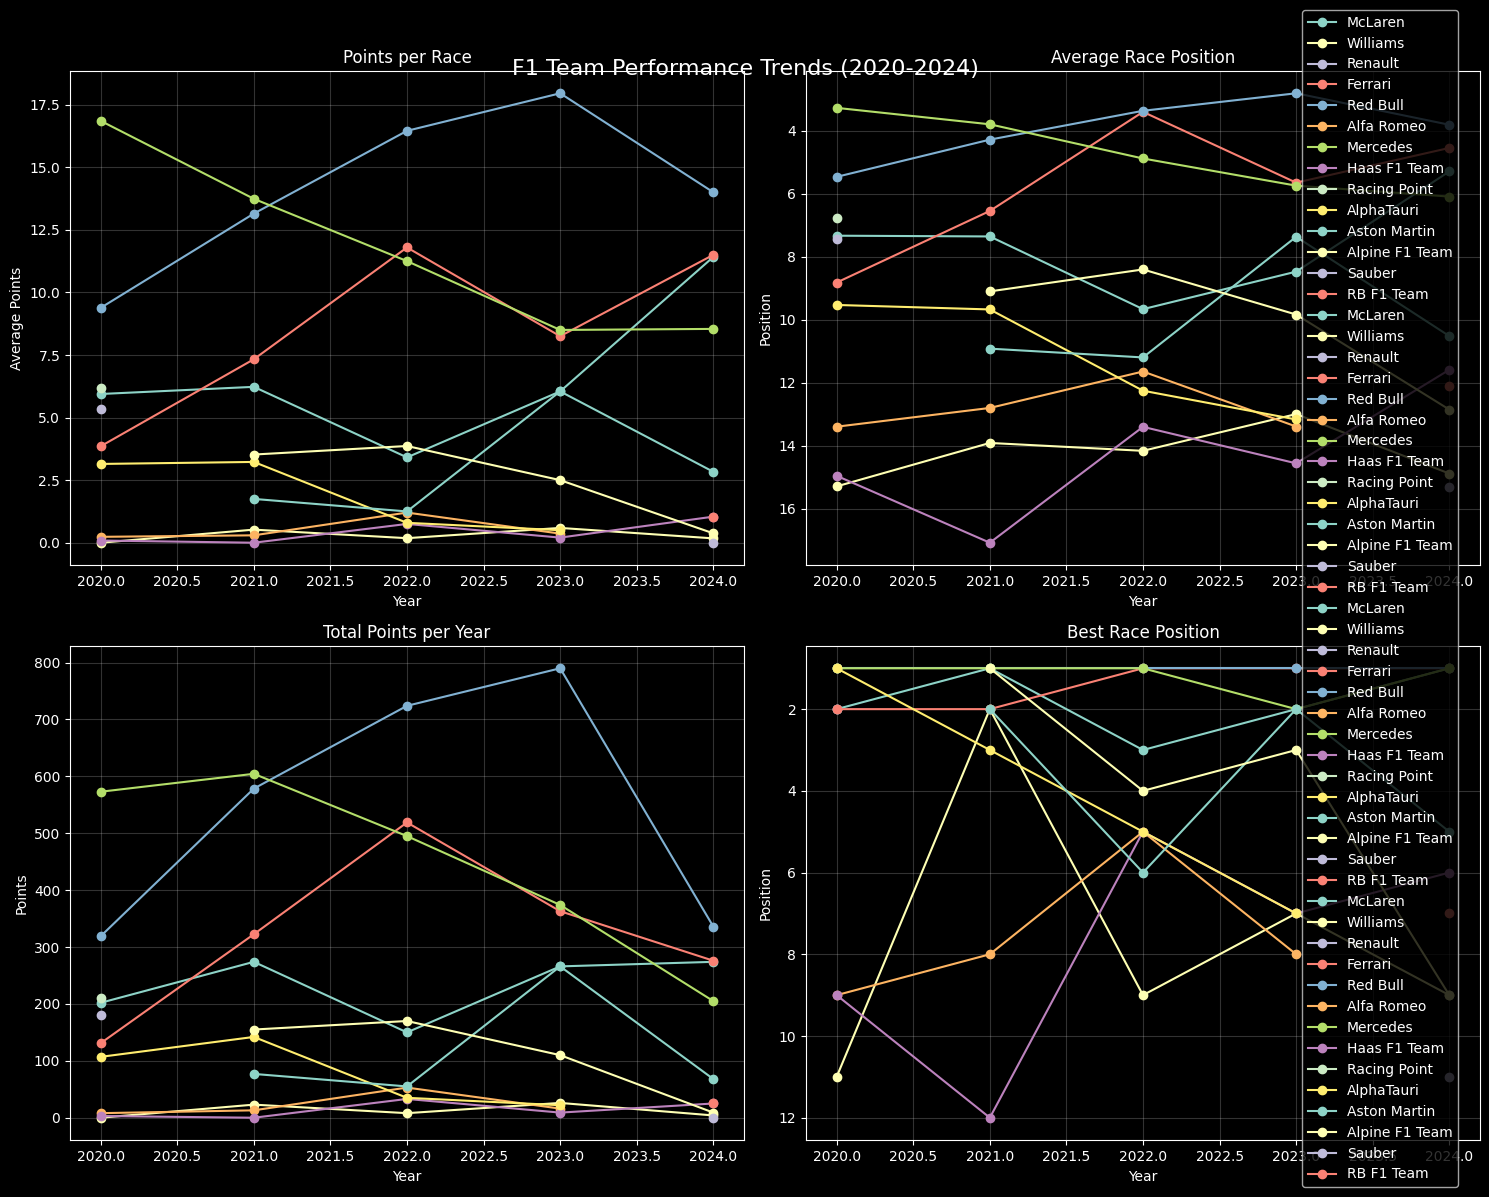


Team Performance Insights:

McLaren:
Performance Trend: Improving
Position Trend: Improving
Current Points per Race: 11.42
Current Average Position: 5.3
Best Position Achieved: 1.0

Williams:
Performance Trend: Improving
Position Trend: Improving
Current Points per Race: 0.17
Current Average Position: 14.9
Best Position Achieved: 2.0

Renault:
Performance Trend: Declining
Position Trend: Declining
Current Points per Race: 5.32
Current Average Position: 7.4
Best Position Achieved: 2.0

Ferrari:
Performance Trend: Improving
Position Trend: Improving
Current Points per Race: 11.50
Current Average Position: 4.5
Best Position Achieved: 1.0

Red Bull:
Performance Trend: Improving
Position Trend: Improving
Current Points per Race: 14.00
Current Average Position: 3.8
Best Position Achieved: 1.0

Alfa Romeo:
Performance Trend: Improving
Position Trend: Improving
Current Points per Race: 0.36
Current Average Position: 13.4
Best Position Achieved: 5.0

Mercedes:
Performance Trend: Declining
Posi

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_team_trends():
    # Load necessary data
    results = pd.read_csv('results.csv')
    races = pd.read_csv('races.csv')
    constructors = pd.read_csv('constructors.csv')
    
    # Merge data to get complete race information
    race_results = results.merge(races[['raceId', 'year', 'round']], on='raceId')
    
    # Focus on recent years (2020-2024)
    recent_years = range(2020, 2025)
    recent_results = race_results[race_results['year'].isin(recent_years)]
    
    # Convert position to numeric, handling any non-numeric values
    recent_results['position'] = pd.to_numeric(recent_results['position'], errors='coerce')
    
    # Calculate key metrics per team per year
    team_yearly_stats = recent_results.groupby(['year', 'constructorId']).agg({
        'points': 'sum',  # Total points
        'position': ['mean', 'min'],  # Average and best finish position
        'raceId': 'count'  # Number of races
    }).reset_index()
    
    # Flatten column names
    team_yearly_stats.columns = ['year', 'constructorId', 'total_points', 'avg_position', 'best_position', 'races']
    
    # Calculate points per race
    team_yearly_stats['points_per_race'] = team_yearly_stats['total_points'] / team_yearly_stats['races']
    
    # Add constructor names
    team_yearly_stats = team_yearly_stats.merge(
        constructors[['constructorId', 'name']], 
        on='constructorId'
    )
    
    return team_yearly_stats

def plot_team_trends(team_stats):
    plt.style.use('dark_background')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('F1 Team Performance Trends (2020-2024)', size=16, y=0.95)
    
    # Points per Race Trend
    ax1 = axes[0, 0]
    for team in team_stats['name'].unique():
        team_data = team_stats[team_stats['name'] == team]
        ax1.plot(team_data['year'], team_data['points_per_race'], marker='o', label=team)
    ax1.set_title('Points per Race')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average Points')
    ax1.grid(True, alpha=0.2)
    
    # Average Position Trend
    ax2 = axes[0, 1]
    for team in team_stats['name'].unique():
        team_data = team_stats[team_stats['name'] == team]
        ax2.plot(team_data['year'], team_data['avg_position'], marker='o', label=team)
    ax2.set_title('Average Race Position')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Position')
    ax2.grid(True, alpha=0.2)
    ax2.invert_yaxis()  # Lower position numbers are better
    
    # Total Points per Year
    ax3 = axes[1, 0]
    for team in team_stats['name'].unique():
        team_data = team_stats[team_stats['name'] == team]
        ax3.plot(team_data['year'], team_data['total_points'], marker='o', label=team)
    ax3.set_title('Total Points per Year')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Points')
    ax3.grid(True, alpha=0.2)
    
    # Best Position Trend
    ax4 = axes[1, 1]
    for team in team_stats['name'].unique():
        team_data = team_stats[team_stats['name'] == team]
        ax4.plot(team_data['year'], team_data['best_position'], marker='o', label=team)
    ax4.set_title('Best Race Position')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Position')
    ax4.grid(True, alpha=0.2)
    ax4.invert_yaxis()
    
    # Adjust layout and add legend
    plt.tight_layout()
    fig.legend(
        loc='center right', 
        bbox_to_anchor=(0.98, 0.5), 
        bbox_transform=fig.transFigure
    )
    
    return fig

def get_team_insights(team_stats):
    insights = {}
    
    for team in team_stats['name'].unique():
        team_data = team_stats[team_stats['name'] == team]
        
        # Calculate trends
        points_trend = team_data['points_per_race'].diff().mean()
        position_trend = team_data['avg_position'].diff().mean()
        
        # Get latest performance
        latest_data = team_data.iloc[-1]
        
        insights[team] = {
            'points_trend': 'Improving' if points_trend > 0 else 'Declining',
            'position_trend': 'Improving' if position_trend < 0 else 'Declining',
            'latest_points_per_race': latest_data['points_per_race'],
            'latest_avg_position': latest_data['avg_position'],
            'best_position_ever': team_data['best_position'].min()
        }
    
    return insights

if __name__ == "__main__":
    # Get team performance stats
    team_stats = analyze_team_trends()
    
    # Create visualization
    fig = plot_team_trends(team_stats)
    plt.show()
    
    # Get team insights
    insights = get_team_insights(team_stats)
    
    # Print insights
    print("\nTeam Performance Insights:")
    for team, data in insights.items():
        print(f"\n{team}:")
        print(f"Performance Trend: {data['points_trend']}")
        print(f"Position Trend: {data['position_trend']}")
        print(f"Current Points per Race: {data['latest_points_per_race']:.2f}")
        print(f"Current Average Position: {data['latest_avg_position']:.1f}")
        print(f"Best Position Achieved: {data['best_position_ever']}")